#Business Understanding

#Data Understanding

##Import Data

In [8]:
telemetry = pd.read_csv("/content/dataToService/telemetry.csv", error_bad_lines=False)
errors = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/errors.csv", error_bad_lines=False)
maint = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/maint.csv", error_bad_lines=False)
failures = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/failures.csv", error_bad_lines=False)
machines = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/machines.csv", error_bad_lines=False)
cities = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/cities.csv", error_bad_lines=False)
machinesLocation = pd.read_csv("/content/drive/MyDrive/03 Schule/02_MSE/04_Masterarbeit/10_SAS_Workshop/Final Data/machineLocation.csv", error_bad_lines=False)

## Telemetry Data

In [9]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [10]:
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
876099,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


In [11]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [12]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [13]:
telemetry["machineID"].nunique()

100

Changing the format of "datetime" to a datetime format

In [14]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [15]:
telemetry.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

the dtype of this series is "object" because it has mixed types

Text(0.5, 0, 'Pressure')

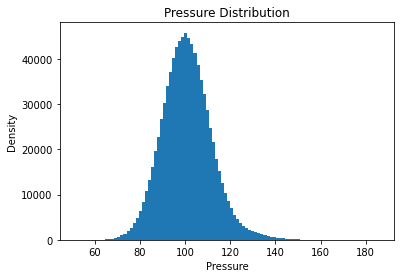

In [22]:
plt.hist(telemetry["pressure"], bins=100)
plt.title("Pressure Distribution")
plt.ylabel("Density")
plt.xlabel("Pressure")

In [17]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


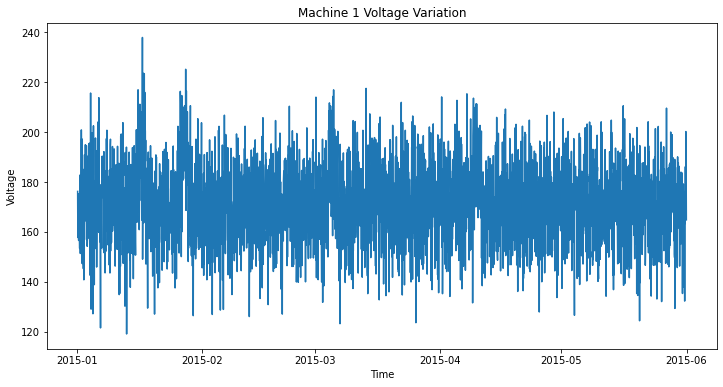

In [18]:
plot_df = telemetry.loc[
    (telemetry["machineID"] == 1)
    & (telemetry["datetime"] > pd.to_datetime("2015-01-01"))
    & (telemetry["datetime"] < pd.to_datetime("2015-06-01")), ["datetime", "volt"]
]

plt.figure(figsize=(12, 6))
plt.plot(plot_df["datetime"], plot_df["volt"])
plt.title("Machine 1 Voltage Variation")
plt.ylabel("Voltage")

#make labels readable
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = "%m-%d"
plt.xlabel("Time")
plt.show()

## Error Data

In [ ]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


These are warning errors generated while the machine is still operating and are not considered faults. Error date and times are rounded to the nearest hour as telemetry data is collected on an hourly basis.

In [ ]:
errors.tail()

,datetime,machineID,errorID
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3
3918,2015-12-22 03:00:00,100,error3


In [ ]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [ ]:
errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
errors["errorID"] = errors["errorID"].astype("category")

errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


*   Categories allow comparison between values, automatic sorting, easier graphing and other functions.
*   Also less memory (similar to "factor" in R).


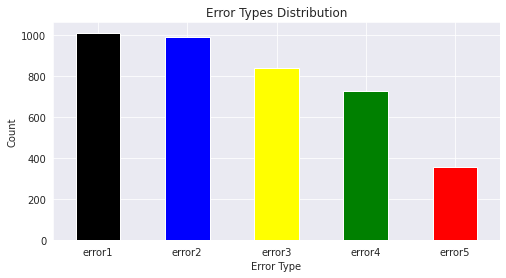

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors["errorID"].value_counts().plot(kind="bar",color = ["black", "blue","yellow", "green", "red"], rot=0)
plt.title("Error Types Distribution")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

## Maintenance Data

Records that correspond to both regular inspections and failures. A record is generated if a component is replaced during the scheduled inspection or is replaced due to a failure. Records that are created due to failures will be called as such, failures. The maintenance data has records for both 2014 and 2015.

In [ ]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [ ]:
maint.tail()

,datetime,machineID,comp
3281,2015-10-10 06:00:00,100,comp3
3282,2015-10-25 06:00:00,100,comp4
3283,2015-11-09 06:00:00,100,comp4
3284,2015-12-09 06:00:00,100,comp2
3285,2015-12-24 06:00:00,100,comp2


In [ ]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3286 non-null   object
 1   machineID  3286 non-null   int64 
 2   comp       3286 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [ ]:
maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
maint["comp"] = maint["comp"].astype("category")
maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp               category
dtype: object

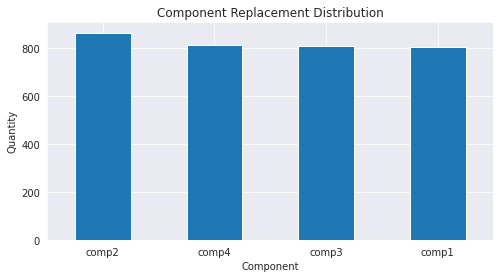

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint["comp"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Replacement Distribution")
plt.ylabel("Quantity")
plt.xlabel("Component")
plt.show()

## Machine Data

In [ ]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [ ]:
machines.tail()

,machineID,model,age
95,96,model2,10
96,97,model2,14
97,98,model2,20
98,99,model1,14
99,100,model4,5


In [ ]:
machines.shape

(100, 3)

In [ ]:
machines.dtypes

machineID     int64
model        object
age           int64
dtype: object

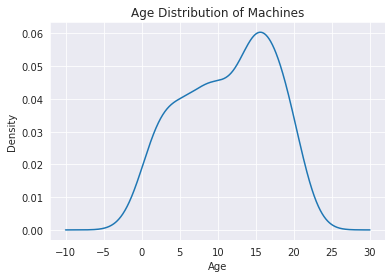

In [ ]:
machines["age"].plot(kind="kde")
plt.title("Age Distribution of Machines")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

We check if there are several hills as it may suggest two different groups.

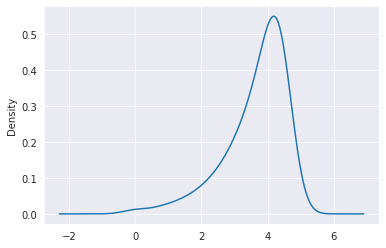

In [ ]:
np.log(machines[machines["age"] != 0].iloc[:, 0]).plot(kind="kde")
plt.show()

We apply natural logarithm to normalize.

In [ ]:
machines["model"] = machines["model"].astype("category")
machines.dtypes

machineID       int64
model        category
age             int64
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



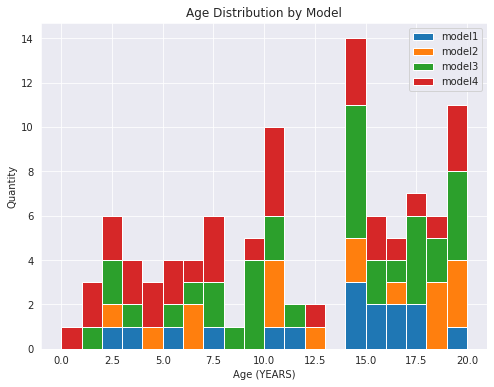

In [ ]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    machines.loc[machines["model"] == "model1", "age"],
    machines.loc[machines["model"] == "model2", "age"],
    machines.loc[machines["model"] == "model3", "age"],
    machines.loc[machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Age Distribution by Model")
plt.xlabel("Age (YEARS)")
plt.ylabel("Quantity")
plt.legend()
plt.show()

In [ ]:
machines.describe()

,machineID,age
count,100.000000,100.000000
mean,50.500000,11.330000
std,29.011492,5.856974
min,1.000000,0.000000
25%,25.750000,6.750000
50%,50.500000,12.000000
75%,75.250000,16.000000
max,100.000000,20.000000


## Failure Data

These are records of component replacements due to failures. Each record has a date and time, machine ID and the failed component.

In [ ]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [ ]:
failures.tail()

,datetime,machineID,failure
756,2015-11-29 06:00:00,99,comp3
757,2015-12-14 06:00:00,99,comp4
758,2015-02-12 06:00:00,100,comp1
759,2015-09-10 06:00:00,100,comp1
760,2015-12-09 06:00:00,100,comp2


In [ ]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   761 non-null    object
 1   machineID  761 non-null    int64 
 2   failure    761 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.0+ KB


In [ ]:
failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
failures["failure"] = failures["failure"].astype("category")
failures.dtypes

datetime     datetime64[ns]
machineID             int64
failure            category
dtype: object

In [ ]:
failures.describe(include="all", datetime_is_numeric=True)

,datetime,machineID,failure
count,761,761.000000,761
unique,NaN,NaN,4
top,NaN,NaN,comp2
freq,NaN,NaN,259
mean,2015-06-24 12:12:17.976345856,51.911958,NaN
min,2015-01-02 03:00:00,1.000000,NaN
25%,2015-03-23 06:00:00,24.000000,NaN
50%,2015-06-24 06:00:00,51.000000,NaN
75%,2015-09-23 06:00:00,79.000000,NaN
max,2015-12-31 06:00:00,100.000000,NaN


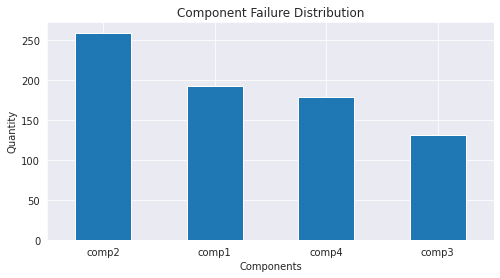

In [ ]:
plt.figure(figsize=(8, 4))
failures["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Failure Distribution")
plt.ylabel("Quantity")
plt.xlabel("Components")
plt.show()

## Machine Location Data

In [ ]:
machinesLocation.head()

,machineID,cityID
0,1,28
1,2,28
2,3,20
3,4,31
4,5,47


In [ ]:
machinesLocation.tail()

,machineID,cityID
95,96,37
96,97,47
97,98,9
98,99,34
99,100,14


## Cities Data

In [ ]:
cities.head()

,cityID,Name,Latitude,Longitude
0,1,Zuerich,47.374156,8.539632
1,2,Genf,46.204391,6.143158
2,3,Basel,47.559599,7.588576
3,4,Bern,46.947773,7.441641
4,5,Lausanne,46.519384,6.635008


In [ ]:
cities.tail()

,cityID,Name,Latitude,Longitude
45,46,Vevey,46.465435,6.836549
46,47,Buelach,47.517963,8.541800
47,48,Reinach,47.490682,7.589437
48,49,Baden,47.472880,8.308090
49,50,Adliswil,47.312435,8.527046


In [ ]:
cities.dtypes

cityID         int64
Name          object
Latitude     float64
Longitude    float64
dtype: object

## Join Data (Machine, Location)

In [ ]:
citiesMachinesLocation = cities.set_index('cityID').join(machinesLocation.set_index('cityID'))

In [ ]:
citiesMachinesLocation.head()

,Name,Latitude,Longitude,machineID
cityID,,,,
1,Zuerich,47.374156,8.539632,9.0
1,Zuerich,47.374156,8.539632,11.0
1,Zuerich,47.374156,8.539632,26.0
2,Genf,46.204391,6.143158,NaN
3,Basel,47.559599,7.588576,95.0


In [ ]:
citiesMachinesLocation.tail()

,Name,Latitude,Longitude,machineID
cityID,,,,
48,Reinach,47.490682,7.589437,68.0
49,Baden,47.472880,8.308090,27.0
49,Baden,47.472880,8.308090,38.0
50,Adliswil,47.312435,8.527046,58.0
50,Adliswil,47.312435,8.527046,94.0


In [ ]:

citiesMachinesLocation.dropna(subset = ["machineID"], inplace=True)
citiesMachinesLocation["machineID"] = citiesMachinesLocation["machineID"].astype(int)

In [ ]:
citiesMachinesLocation.head()

,Name,Latitude,Longitude,machineID
cityID,,,,
1,Zuerich,47.374156,8.539632,9
1,Zuerich,47.374156,8.539632,11
1,Zuerich,47.374156,8.539632,26
3,Basel,47.559599,7.588576,95
4,Bern,46.947773,7.441641,56


In [ ]:
citiesMachinesModelLocation = citiesMachinesLocation.set_index('machineID').join(machines.set_index('machineID'))

In [ ]:
citiesMachinesModelLocation.head()

,Name,Latitude,Longitude,model,age
machineID,,,,,
9,Zuerich,47.374156,8.539632,model4,7
11,Zuerich,47.374156,8.539632,model2,6
26,Zuerich,47.374156,8.539632,model3,3
95,Basel,47.559599,7.588576,model2,18
56,Bern,46.947773,7.441641,model1,10


In [ ]:
citiesMachinesModelLocation.tail()

,Name,Latitude,Longitude,model,age
machineID,,,,,
68,Reinach,47.490682,7.589437,model3,10
27,Baden,47.472880,8.308090,model3,9
38,Baden,47.472880,8.308090,model4,15
58,Adliswil,47.312435,8.527046,model1,5
94,Adliswil,47.312435,8.527046,model2,18


In [ ]:
citiesMachinesModelLocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 9 to 94
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       100 non-null    object 
 1   Latitude   100 non-null    float64
 2   Longitude  100 non-null    float64
 3   model      100 non-null    object 
 4   age        100 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.7+ KB


## Plot on Map

In [ ]:
citiesCountMachines = pd.DataFrame({'count' : citiesMachinesModelLocation.groupby( [ "Name", "Longitude", "Latitude"] ).size()}).reset_index()
citiesCountMachines.head()

,Name,Longitude,Latitude,count
0,Aarau,8.049558,47.391383,2
1,Adliswil,8.527046,47.312435,2
2,Allschwil,7.543362,47.552892,5
3,Baar,8.526087,47.195373,2
4,Baden,8.308090,47.472880,2


In [ ]:
fig = px.scatter_mapbox(citiesCountMachines, lat="Latitude", lon="Longitude", hover_name="Name", color_discrete_sequence=["fuchsia"], zoom=6, height=400, size="count")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#hover_data=["model", "age"],

#Data Preparation

## Feature Engineering

Telemetry data almost always come with time stamps, which makes them suitable for calculating lagging features (statistics of certain values within a time window).

We will choose the size of a window and calculate the aggregate measures (mean, standard deviation, minimum, maximum, etc.) to represent the short-term history.

We will then calculate the moving average and standard deviation of the telemetry data in the last 3-hour delay window.

In [ ]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00    170.028993
           2015-01-01 12:00:00    164.192565
           2015-01-01 15:00:00    168.134445
           2015-01-01 18:00:00    165.514453
           2015-01-01 21:00:00    168.809347
dtype: float64

In [ ]:
telemetry_mean_3h = pd.concat(temp, axis=1) # Join the series.
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields] # Assign column names.
telemetry_mean_3h.reset_index(inplace=True) # Flatten the frame.
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [ ]:
telemetry_mean_3h.tail()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630
292099,100,2016-01-01 09:00:00,171.336037,496.096870,79.095538,37.845245


Repeat for standard deviation.

In [ ]:
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00     6.721032
           2015-01-01 12:00:00     7.596570
           2015-01-01 15:00:00    10.124584
           2015-01-01 18:00:00     4.673269
           2015-01-01 21:00:00    14.752132
dtype: float64

In [ ]:
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [ ]:
telemetry_sd_3h.tail()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
292095,100,2015-12-31 21:00:00,29.351231,69.348245,16.940674,3.731256
292096,100,2016-01-01 00:00:00,9.605817,78.036116,9.154932,3.379639
292097,100,2016-01-01 03:00:00,8.457322,43.021553,0.785721,3.198928
292098,100,2016-01-01 06:00:00,14.835200,19.208302,5.002788,6.836757
292099,100,2016-01-01 09:00:00,NaN,NaN,NaN,NaN


To capture a longer-term effect, 24-hour lagging functions are also calculated.
We create new values with 24-hour averages, and then select the first result every 3 hours.
In this way we can link the results with the previous lagging features (calculated at 3 hours).

In [ ]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

Due to the moving average method, the first 23 records are null; they must be eliminated.
It does not occur at the end of the frame because rolling stops at the end.
We end up with a frame with less data than the original telemetry frame as well as the previous 3H frame.

In [ ]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]

In [ ]:
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214


Repeat for standard deviation

In [ ]:
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [ ]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]

In [ ]:
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,13.995465,40.843882,11.036546,5.561553


Combine the features created so far.
We take the values 2:6 to avoid duplicate IDs and dates.
"axis=0" we move in the direction of the rows, "axis=1", we move in the direction of the columns.

In [ ]:
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [ ]:
telemetry_feat.tail()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
292094,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038
292095,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962
292096,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191
292097,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756
292098,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630,14.835200,19.208302,5.002788,6.836757,172.838745,461.095362,101.396728,39.964090,15.119775,65.929509,8.836617,6.139142


In [ ]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


## Lag Features in Errors

Like telemetry data, errors come with time stamps. We count the number of errors of each type in a delayed window.

In [ ]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


We begin by reformatting the error data so that we have one entry per machine per time
when at least one error occurred.
We create a column for each type of error.

In [ ]:
error_count = pd.get_dummies(errors) # Put a 1 if the error appears for that machine, 0 otherwise.
error_count.columns = ["datetime", "machineID", "error1", "error2", "error3", "error4", "error5"]
error_count.head(15)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


Dataframe dates are repeated, so we group by date.
We combine errors for a given machine at a specific time.
We do summation in case there are multiple errors of the same type at the same time, but not expected.

In [ ]:
error_count_grouped = error_count.groupby(["machineID", "datetime"]).sum().reset_index()
error_count_grouped.head(15)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


Check that the registered errors exist on the available machines by filling with 0
the non-matches so we only search for matches with datetime and machineID.

In [ ]:
error_count_filtered = telemetry[["datetime", "machineID"]].merge(
    error_count_grouped,
    on=["machineID", "datetime"],
    how="left"
).fillna(0.0)

error_count_filtered.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


Check for anomalies.

In [ ]:
error_count_filtered.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Calculate the total number of errors for each type of error during 24-hour periods. 
We will take points every 3 hours.

In [ ]:
temp = []
fields = [
    "error%d" % i
    for i in range(1,6)
]

temp = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00    NaN
           2015-01-01 12:00:00    NaN
           2015-01-01 15:00:00    NaN
           2015-01-01 18:00:00    NaN
           2015-01-01 21:00:00    NaN
           2015-01-02 00:00:00    NaN
           2015-01-02 03:00:00    NaN
           2015-01-02 06:00:00    0.0
           2015-01-02 09:00:00    0.0
           2015-01-02 12:00:00    0.0
dtype: float64

In [ ]:
error_count_total = pd.concat(temp, axis=1)
error_count_total.columns = [i + "count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [ ]:
error_count_total["error2count"].unique()

array([0., 1., 2.])

In [ ]:
error_count_total.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


## Time Since Last Maintenance Replacement

Maintenance records contain information from component replacement records. Possible characteristics of this data set may be to calculate how long it has been since a component was last replaced, since the longer a component is used, the greater the degradation.

In this section, domain knowledge plays an important role in understanding the predictive factors of a problem. In the following, the days since the last component replacement are calculated for each component type as characteristics from the maintenance data.

In [ ]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


Create a column for each type of error

In [ ]:
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ["datetime", "machineID", "comp1", "comp2", "comp3", "comp4"]
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,0,1,0,0
1,2014-07-16 06:00:00,1,0,0,0,1
2,2014-07-31 06:00:00,1,0,0,1,0
3,2014-12-13 06:00:00,1,1,0,0,0
4,2015-01-05 06:00:00,1,0,0,0,1


Combine repairs for a certain machine at a certain time.
If we do not group by date we can see another perspective.
We find which components fail together, since we group by date.

In [ ]:
comp_rep = comp_rep.groupby(["machineID", "datetime"]).sum().reset_index()
comp_rep.head()

,machineID,datetime,comp1,comp2,comp3,comp4
0,1,2014-06-01 06:00:00,0,1,0,0
1,1,2014-07-16 06:00:00,0,0,0,1
2,1,2014-07-31 06:00:00,0,0,1,0
3,1,2014-12-13 06:00:00,1,0,0,0
4,1,2015-01-05 06:00:00,1,0,0,1


The times when there were no replacements have to be added

In [ ]:
comp_rep = telemetry[["datetime", "machineID"]].merge(
    comp_rep,
    on=["datetime", "machineID"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime"]
)
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
876100,2014-06-01 06:00:00,1,0.0,1.0,0.0,0.0
876101,2014-07-16 06:00:00,1,0.0,0.0,0.0,1.0
876102,2014-07-31 06:00:00,1,0.0,0.0,1.0,0.0
876103,2014-12-13 06:00:00,1,1.0,0.0,0.0,0.0
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0


In [ ]:
components = ["comp1", "comp2", "comp3", "comp4"]
for comp in components:
    # We want to obtain the date of the most recent component change.
    comp_rep.loc[comp_rep[comp] < 1, comp] = None # We fill with null the samples without replacement.
    # the dates of the entries that do have replacements.
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
    # We do a forward-fill of the most recent dates of a component change.
    # We fill with the last valid value found top-bottom.
    comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

# We eliminated samples from 2014, they could have nulls, the maintenance started that year.
comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
comp_rep.head(50)

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
1,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
2,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
3,2015-01-01 09:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
4,2015-01-01 10:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
5,2015-01-01 11:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
6,2015-01-01 12:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
7,2015-01-01 13:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
8,2015-01-01 14:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
9,2015-01-01 15:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00


Replace the most recent change dates with the number of days since the most recent change.

In [ ]:
for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [ ]:
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


## Machine Features

The features of the machines can be used without additional modifications. These include descriptive information on the type of each machine and its age (number of years in service).

In [ ]:
# Join all the created features together.
final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(machines, on=["machineID"], how="left")
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18


In [ ]:
final_feat.tail()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
291295,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,169.764418,454.478787,100.873360,39.094339,15.331755,60.839923,7.891711,5.269038,0.0,0.0,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5
291296,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962,0.0,0.0,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5
291297,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191,0.0,0.0,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5
291298,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756,0.0,0.0,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5
291299,100,2016-01-01 06:00:00,182.525427,435.932056,98.798172,42.757630,14.835200,19.208302,5.002788,6.836757,172.838745,461.095362,101.396728,39.964090,15.119775,65.929509,8.836617,6.139142,0.0,0.0,0.0,0.0,0.0,83.000,8.000,83.000,53.000,model4,5


In [ ]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612973,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


## Labeling Response Variable

When using multi-class classification to predict failures due to a problem, the labeling is done by taking a window of time before an asset failure and labeling the feature records that fall into that window as "about to fail due to a problem" while labeling all other records as "normal". This time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others days or weeks in advance may be needed.

In [ ]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18


The objective is to calculate the probability that a machine will fail in the next 24 hours due to a given component failure.

Next, a categorical failure feature is created to serve as a label. All records within a 24-hour window before a component failure of component 1 have failure = comp1, and so on for components 2, 3 and 4; All records not within 24 hours after a component failure have failure = none

We are telling the model that any value similar to those within the 24-hour window is a failure of that component, which is why the machines repeat.
We use limit=7 because we have 3 hour separations; 8 * 3 = 24 hours but we take into account the first non-zero value, so it is 7.

In [ ]:
labeled_features = final_feat.merge(failures, on=["datetime", "machineID"], how="left")
# We apply a backward-fill of up to 24h.
# Pass to object or string, apply the operation, and return to category.
labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=7)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [ ]:
model_dummies = pd.get_dummies(labeled_features["model"])
labeled_features = pd.concat([labeled_features, model_dummies], axis=1)
labeled_features.drop("model", axis=1, inplace=True)

In [ ]:
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age,failure,model1,model2,model3,model4
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209,0.0,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,18,none,0,0,1,0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231,0.0,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,18,none,0,0,1,0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076,0.0,0.0,0.0,0.0,0.0,20.250,215.250,155.250,170.250,18,none,0,0,1,0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944,0.0,0.0,0.0,0.0,0.0,20.375,215.375,155.375,170.375,18,none,0,0,1,0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069,0.0,0.0,0.0,0.0,0.0,20.500,215.500,155.500,170.500,18,none,0,0,1,0


## Correlation Analysis

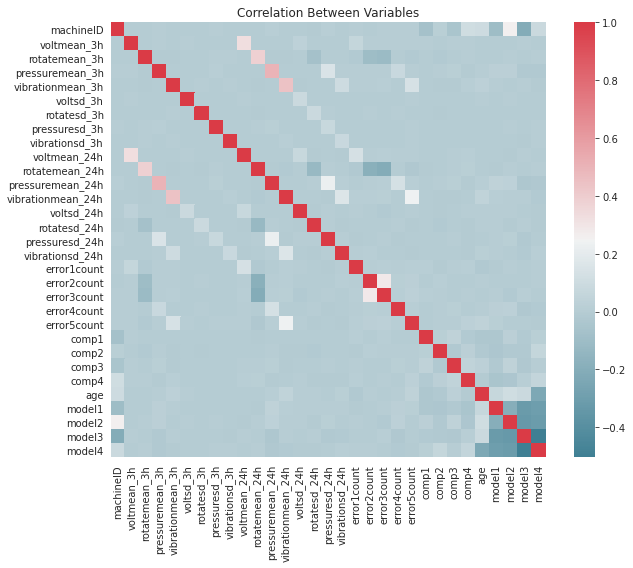

In [ ]:
# It is necessary to eliminate variables with high correlation (only one), consider > 70%.
f, ax = plt.subplots(figsize=(10, 8))
corr = labeled_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Between Variables")
plt.show()

# Modeling - Training, Validation and Testing

When working with time series as in this example, record partitioning in training, validation and testing must be done carefully to avoid overestimating model performance. In predictive maintenance, features are generally generated using lagged aggregates: records in the same time window are likely to have identical labels and similar feature values. These correlations can give a model an "unfair advantage" by predicting a record belonging to the test set that shares its time window with a record from the training set. Therefore, we divide the records in training, validation, and test sets into large portions, to minimize the number of time intervals shared between them.

Predictive models do not have advanced knowledge of future timing trends: in practice, such trends are likely to exist and have an adverse impact on model performance. To obtain an accurate assessment of the performance of a predictive model, it is recommended to perform training on older records and validation/testing using the newer records.

For both reasons, a time-dependent log splitting strategy is an excellent choice for predictive maintenance models. The splitting is performed by choosing a point in time according to the desired size of the training and test sets: all records prior to the time point are used to train the model, and all remaining records are used for testing.

In [ ]:
# Establish the times corresponding to the records to be used for training and testing.
threshold_dates = [
    pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")
]

In [ ]:
test_results = []
test_results_tree = []
test_results_randomForrest = []
models = []
models_tree = []
models_randomForrest = []
total = len(threshold_dates)

# Partition of separate dates.
last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [ ]:
# Typically 20-30% of the data is used.
ntraining = labeled_features.loc[labeled_features["datetime"] < last_train_date]
ntesting = labeled_features.loc[labeled_features["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} training records.")
print(f"{ntesting.shape[0]} records for testing.")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% of the data will be used for testing.")

216732 training records.
73809 records for testing.
34.1% of the data will be used for testing.


In [ ]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

print(f"{fails_train / no_fails_train * 100:0.1f}% of the cases are training set failures.")
print(f"{fails_test / no_fails_test * 100:0.1f}% of the cases are test set failures.")

2.0% of the cases are training set failures.
1.9% of the cases are test set failures.


In [ ]:
# Assign the corresponding values to training and tests.
train_y = labeled_features.loc[labeled_features["datetime"] < last_train_date, "failure"]
train_X = labeled_features.loc[labeled_features["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = labeled_features.loc[labeled_features["datetime"] > first_test_date, "failure"]
test_X = labeled_features.loc[labeled_features["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

## Model Training - Gradient Boosting

In [ ]:
# Model training.
# model = GradientBoostingClassifier(random_state=42)
model = xgb(n_jobs=-1)
model.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Obtain results on the test set.
test_result = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result["predicted_failure"] = model.predict(test_X)
test_results.append(test_result)
models.append(model)

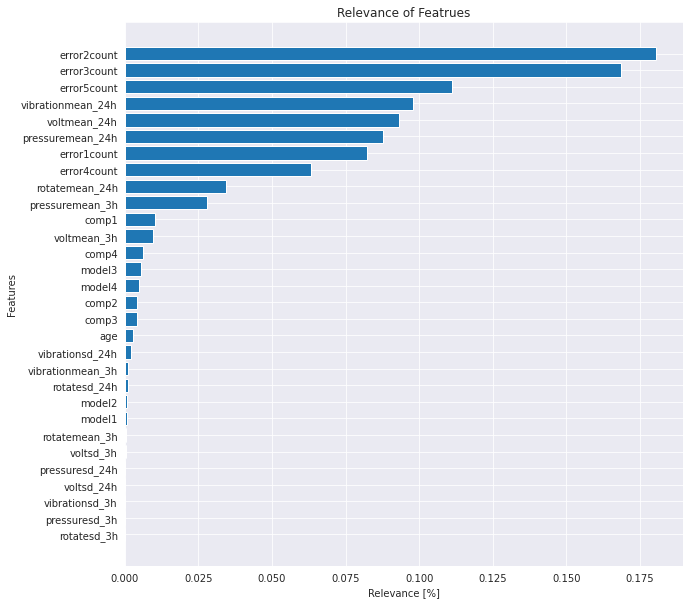

In [ ]:
# Below, we plot the feature importances in the (first) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Features")
plt.xlabel("Relevance [%]")
plt.title("Relevance of Featrues")
plt.show()

### Evaluation - Gradient Boosting

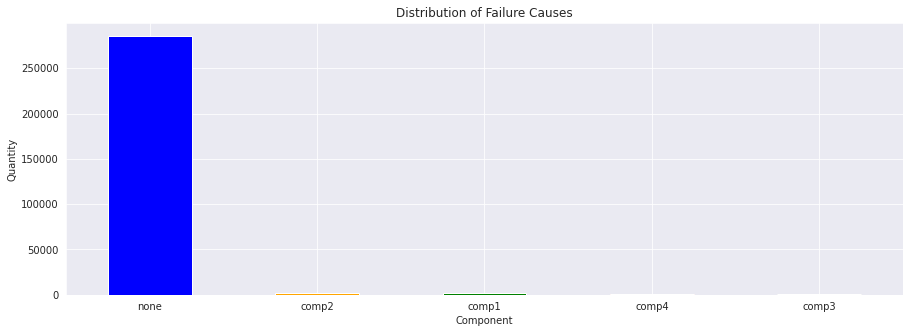

In [ ]:
plt.figure(figsize=(15, 5))
labeled_features["failure"].value_counts().plot(kind="bar", rot=0, color = ["blue", "orange", "green", "red", "black"])
plt.title("Distribution of Failure Causes")
plt.xlabel("Component")
plt.ylabel("Quantity")
plt.show()

There is an expected imbalance.

In [ ]:
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    #print("Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels")
    #print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(["accuracy", "precision", "recall", "F1"])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(["macro precision", "macro recall", "macro F1"])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(["average accuracy",
                          "micro-averaged precision/recall/F1"])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(["majority class accuracy", "majority class recall",
                          "majority class precision", "majority class F1"])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(["expected accuracy", "kappa"])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(["random guess accuracy", "random guess precision",
                          "random guess recall", "random guess F1"])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(["random weighted guess accuracy",
                          "random weighted guess precision",
                          "random weighted guess recall",
                          "random weighted guess F1"])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df

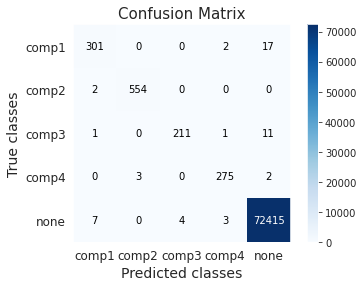

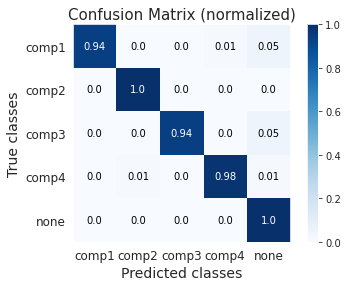

,none,comp1,comp2,comp3,comp4
accuracy,0.999282,0.999282,0.999282,0.999282,0.999282
precision,0.999586,0.967846,0.994614,0.981395,0.978648
recall,0.999807,0.940625,0.996403,0.941964,0.982143
F1,0.999696,0.954041,0.995508,0.961276,0.980392
macro precision,0.984418,0.984418,0.984418,0.984418,0.984418
macro recall,0.972188,0.972188,0.972188,0.972188,0.972188
macro F1,0.978183,0.978183,0.978183,0.978183,0.978183
average accuracy,0.999713,0.999713,0.999713,0.999713,0.999713
micro-averaged precision/recall/F1,0.999282,0.999282,0.999282,0.999282,0.999282
majority class accuracy,0.981303,0.000000,0.000000,0.000000,0.000000


In [ ]:
evaluation_results = []
test_result = test_results[0]
evaluation_result = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=False,
    title="Confusion Matrix"
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=True,
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix (normalized)", fontsize=15)

plt.show()

evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only

In [ ]:
evaluation_results[0].mean(axis=1)[0:4]

accuracy     0.999282
precision    0.984418
recall       0.972188
F1           0.978183
dtype: float64

We are interested in how many errors were found (recall).

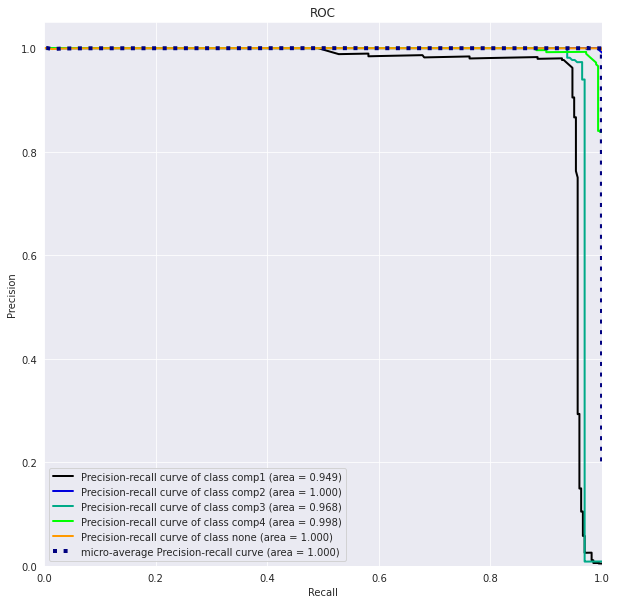

In [ ]:
# For a binary classification problem we usually use the ROC-AUC curve.
# For this multi-class case we will use precision vs. sensitivity.
skplt.metrics.plot_precision_recall(
    test_y,
    model.predict_proba(test_X),
    title="ROC",
    figsize=(10,10)
)
plt.show()

In [ ]:
evaluation_results[0].loc["recall"].values

array([0.99980671, 0.940625  , 0.99640288, 0.94196429, 0.98214286])

In [ ]:
recall_df = pd.DataFrame([evaluation_results[0].loc["recall"].values],
                         columns=["none", "comp1", "comp2", "comp3", "comp4"],
                         index=["Sensitivity per Component"])
recall_df.T

,Sensitivity per Component
none,0.999807
comp1,0.940625
comp2,0.996403
comp3,0.941964
comp4,0.982143


## Model Training - Tree

In [ ]:
model_tree = tree.DecisionTreeClassifier()
model_tree = model_tree.fit(train_X,train_y)
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Obtain results on the test set.
test_result_tree = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result_tree["predicted_failure"] = model_tree.predict(test_X)
test_results_tree.append(test_result_tree)
models_tree.append(model_tree)


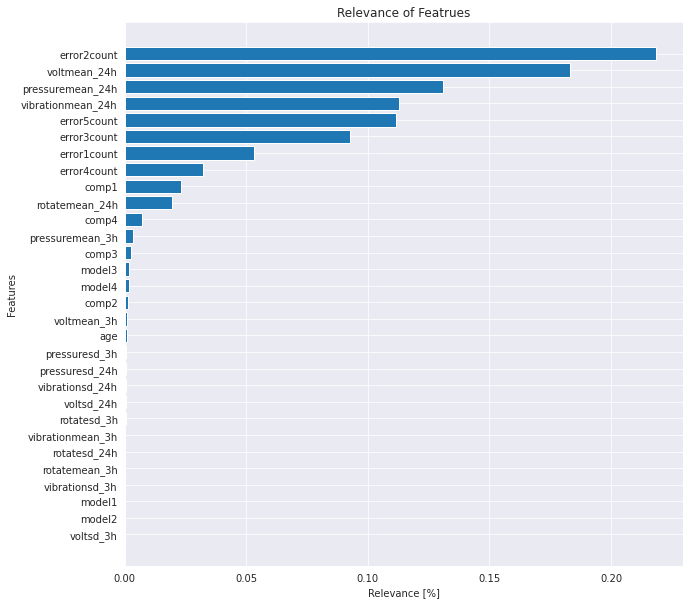

In [ ]:
# Below, we plot the feature importances in the (tree) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models_tree[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Features")
plt.xlabel("Relevance [%]")
plt.title("Relevance of Featrues")
plt.show()

In [ ]:
tree.plot_tree(model_tree)

### Evaluation - Tree

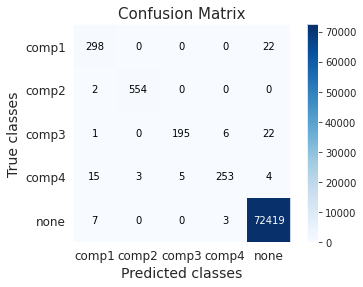

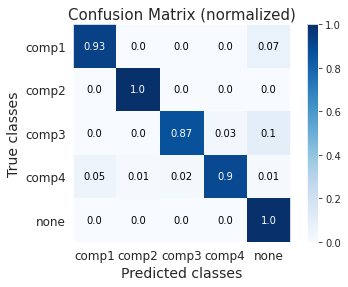

,none,comp1,comp2,comp3,comp4
accuracy,0.998781,0.998781,0.998781,0.998781,0.998781
precision,0.999338,0.922601,0.994614,0.975000,0.965649
recall,0.999862,0.931250,0.996403,0.870536,0.903571
F1,0.999600,0.926905,0.995508,0.919811,0.933579
macro precision,0.971440,0.971440,0.971440,0.971440,0.971440
macro recall,0.940324,0.940324,0.940324,0.940324,0.940324
macro F1,0.955081,0.955081,0.955081,0.955081,0.955081
average accuracy,0.999512,0.999512,0.999512,0.999512,0.999512
micro-averaged precision/recall/F1,0.998781,0.998781,0.998781,0.998781,0.998781
majority class accuracy,0.981303,0.000000,0.000000,0.000000,0.000000


In [ ]:
evaluation_results_tree = []
test_result = test_results_tree[0]
evaluation_result_tree = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result_tree["failure"],
    test_result_tree["predicted_failure"],
    normalize=False,
    title="Confusion Matrix"
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result_tree["failure"],
    test_result_tree["predicted_failure"],
    normalize=True,
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix (normalized)", fontsize=15)

plt.show()

evaluation_results_tree.append(evaluation_result_tree)
evaluation_results_tree[0]  # show full results for first split only

In [ ]:
evaluation_results_tree[0].mean(axis=1)[0:4]

accuracy     0.998781
precision    0.971440
recall       0.940324
F1           0.955081
dtype: float64

## Model Training - Randome Forrest

In [ ]:
model_randomForrest = RandomForestClassifier()
model_randomForrest = model_randomForrest.fit(train_X,train_y)
model_randomForrest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Obtain results on the test set.
test_result_randomForrest = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result_randomForrest["predicted_failure"] = model_randomForrest.predict(test_X)
test_results_randomForrest.append(test_result_randomForrest)
models_randomForrest.append(model_randomForrest)

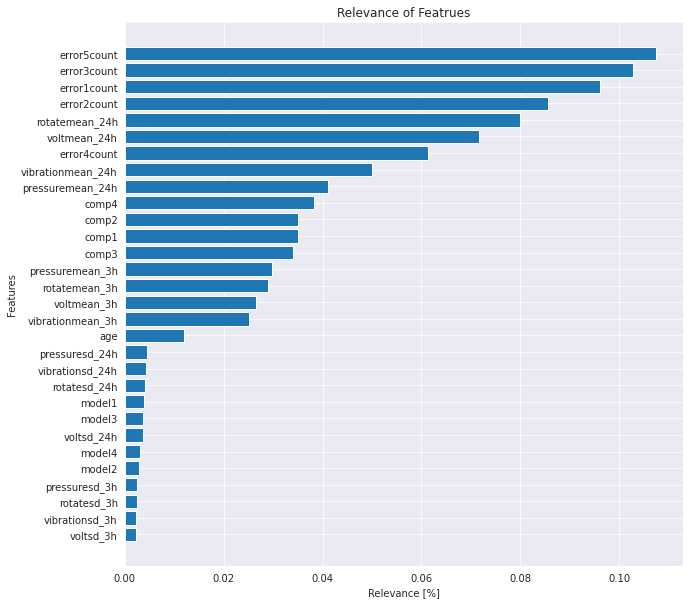

In [ ]:
# Below, we plot the feature importances in the (randomForrest) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models_randomForrest[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Features")
plt.xlabel("Relevance [%]")
plt.title("Relevance of Featrues")
plt.show()

### Evaluation Random Forrest

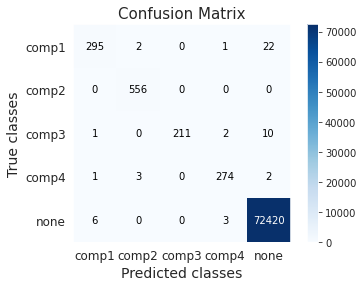

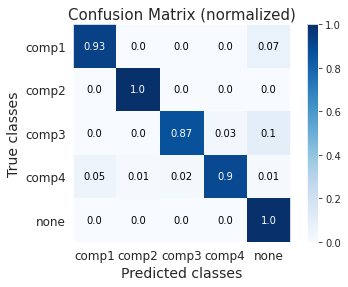

,none,comp1,comp2,comp3,comp4
accuracy,0.999282,0.999282,0.999282,0.999282,0.999282
precision,0.999531,0.973597,0.991087,1.000000,0.978571
recall,0.999876,0.921875,1.000000,0.941964,0.978571
F1,0.999703,0.947030,0.995524,0.970115,0.978571
macro precision,0.988557,0.988557,0.988557,0.988557,0.988557
macro recall,0.968457,0.968457,0.968457,0.968457,0.968457
macro F1,0.978189,0.978189,0.978189,0.978189,0.978189
average accuracy,0.999713,0.999713,0.999713,0.999713,0.999713
micro-averaged precision/recall/F1,0.999282,0.999282,0.999282,0.999282,0.999282
majority class accuracy,0.981303,0.000000,0.000000,0.000000,0.000000


In [ ]:
evaluation_results_randomForrest = []
test_result = test_results_randomForrest[0]
evaluation_result_randomForrest = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result_randomForrest["failure"],
    test_result_randomForrest["predicted_failure"],
    normalize=False,
    title="Confusion Matrix"
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result_tree["failure"],
    test_result_tree["predicted_failure"],
    normalize=True,
)
plt.ylabel('True classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Confusion Matrix (normalized)", fontsize=15)

plt.show()

evaluation_results_randomForrest.append(evaluation_result_randomForrest)
evaluation_results_randomForrest[0]  # show full results for first split only

In [ ]:
evaluation_results_randomForrest[0].mean(axis=1)[0:4]

accuracy     0.999282
precision    0.988557
recall       0.968457
F1           0.978189
dtype: float64

#Libraries and Configuration - Phyton Context

In [1]:
!git clone https://github.com/lukasSchweiger/dataToService.git

Cloning into 'dataToService'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14 (delta 2), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [6]:
pip install scikit-plot

In [7]:
#Chart creation
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import plotly.express as px
#Data manipulation / linear algebra
import numpy as np
import pandas as pd
# Utilities
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
#Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as xgb
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#Others
import warnings